In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

In [5]:
PATH = 'gibbs-mu-v2'
df = pd.read_csv('results/log-%s.txt' % PATH, sep=', ')
NUM_SAMPLES = 10

/home/hao/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [6]:
df

,EUBO,ELBO,ESS,KLs_ex,KLs_in
0,-271.438622,-376.413851,1.046086,277.611175,37.676076
1,-252.717254,-378.757807,1.048369,280.759601,31.036294
2,-240.761258,-379.262842,1.043640,280.265638,27.259000
3,-228.904460,-373.568177,1.047106,274.473766,24.731284
4,-220.139765,-367.113709,1.045150,268.754449,23.037064
5,-210.663076,-355.886326,1.052376,257.720858,22.191105
6,-202.132533,-347.373375,1.049666,248.890918,21.850915
7,-194.673206,-339.216839,1.050786,240.079926,21.635543
8,-186.739424,-330.373766,1.057157,231.707691,21.915588
9,-181.782815,-317.961846,1.062167,219.922153,22.469506


In [11]:
def plot_results(df):
    fig = plt.figure(figsize=(15, 15))
    fig.tight_layout()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    ax1.plot(df['EUBO'].values, 'r', label='EUBOs')
    ax1.plot(df['ELBO'].values, 'b', label='ELBOs')

    ax1.tick_params(labelsize=18)
    ax2.set_yscale('log')
    ax2.plot(df['KLs_ex'].values, 'r', label='exclusive KL')
    ax2.plot(df['KLs_in'].values, 'b', label='inclusive KL')
    ax3.plot(df['ESS'].values / NUM_SAMPLES, 'm', label='ESS')
    ax1.set_ylim([-150, -90])
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax2.set_ylim([0, 6])
    ax2.tick_params(labelsize=18)
    ax3.tick_params(labelsize=18)
    ax3.set_ylim([0,1])
    plt.savefig('results/train_' + PATH + '.svg')

In [27]:
def plot_results(df):
    fig = plt.figure(figsize=(15, 15))
    fig.tight_layout()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    ax1.plot(df['EUBO'].values, 'r', label='EUBOs')
    ax1.plot(df['ELBO'].values, 'b', label='ELBOs')

    ax1.tick_params(labelsize=18)
#     ax2.set_yscale('log')
    ax2.plot(df['IWKLs_ex'].values, 'r', label='exclusive KL')
    ax2.plot(df['IWKLs_in'].values, 'b', label='inclusive KL')
    ax3.plot(df['ESS'].values / NUM_SAMPLES, 'm', label='ESS')
    ax1.set_ylim([-280, -190])
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax2.set_ylim([0, 6])
    ax2.tick_params(labelsize=18)
    ax3.tick_params(labelsize=18)
    ax3.set_ylim([0,1])
    plt.savefig('train_' + PATH + '.svg')

/home/hao/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


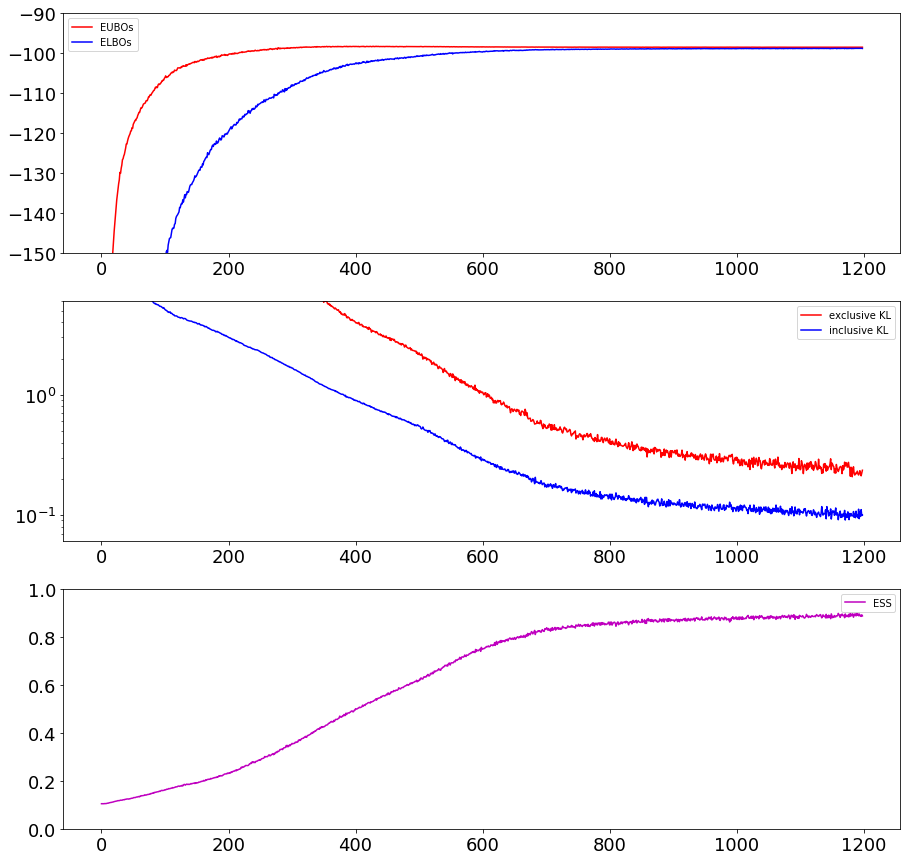

In [12]:
plot_results(df)